In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pylab as plt

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

user = np.matrix(ratings.user_id).T
movie = np.matrix(ratings.movie_id).T
rating = np.matrix(ratings.rating).T



In [15]:
print(rating)

[[5]
 [3]
 [3]
 ..., 
 [5]
 [4]
 [4]]


In [ ]:
Ys = np.hstack([rating,user,movie])
movieMax = 0
userMax = 0
for i in range (Ys.shape[0]):
    if(Ys[i,2]>movieMax):
        movieMax = Ys[i,2]
    if(Ys[i,1]>userMax):
        userMax = Ys[i,1]

In [35]:
        
print(movieMax)
print(userMax)
np.random.shuffle(Ys)
print(Ys)

3952
6040
[[   4 2414 2099]
 [   4 3163 3262]
 [   4 1635 2787]
 ..., 
 [   4 1320  507]
 [   3 3371 1136]
 [   4 4345   46]]


In [36]:
Nr = 6041 ## there are 6040 users 
Nc = 3953 ## there are 3952 movies
user_zeros = np.matrix([0]*Nr).T 
movie_zeros = np.matrix([0]*Nc) 
Y = user_zeros*movie_zeros
M = user_zeros*movie_zeros
print(Y.shape)

(6041, 3953)


In [37]:
A = np.mat(np.random.rand(Nr, 1))
B = np.mat(np.random.rand(1, Nc))

print(A)
print(B)

[[ 0.58629211]
 [ 0.5168715 ]
 [ 0.35504641]
 ..., 
 [ 0.57147945]
 [ 0.19111464]
 [ 0.31797327]]
[[ 0.21446937  0.1664273   0.82126997 ...,  0.05740207  0.25644474
   0.29662029]]


In [38]:
for j in range (len(Ys)):
    u = user[j]
    m = movie[j]
    r = rating[j]
    Y[u,m] = r
    M[u,m] = 1
print (Y[1,1193])
print(M)

5
[[0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]


In [39]:
import timeit
EPOCH = 5
Eta = 0.1
eta = Eta

E = np.array(M)*np.array(Y - A*B)
Err = np.sum(E*E)/np.sum(np.array(M))
print(Err)

12.4069263999


In [40]:
SGD_Error = []
SGD_Time = []
start = timeit.default_timer()
Ysize = Ys.shape[0]
for l in range(EPOCH):
    E = np.array(M)*np.array(Y - A*B)
    Err = np.sum(E*E)/np.sum(np.array(M))
    stop = timeit.default_timer()
    SGD_Error.append(Err)
    SGD_Time.append(stop-start)
    for k in range(Ysize):
        u = Ys[k,1]
        m = Ys[k,2]
        
        err = Ys[k,0] - A[u,:]*B[:,m]
        
        temp_A = A[u,:] + eta*err[0,0]*B[:,m].T
        B[:,m]   = B[:,m] + eta*err[0,0]*A[u,:].T
        A[u,:]   = temp_A
    
    eta = Eta*1./(l+1)
    
E = np.array(M)*np.array(Y - A*B)
Err = np.sum(E*E)/np.sum(np.array(M))
stop = timeit.default_timer()
SGD_Error.append(Err)
SGD_Time.append(stop-start)
print(A*B)

[[ 0.1257417   1.27085487  1.01041914 ...,  1.11839496  1.25945871
   1.23052031]
 [ 0.42100001  4.25499184  3.38301823 ...,  3.74453572  4.21683598
   4.11994636]
 [ 0.42333903  4.27863206  3.40181387 ...,  3.7653399   4.24026421
   4.14283628]
 ..., 
 [ 0.41251924  4.1692779   3.31486962 ...,  3.66910458  4.13189067
   4.03695282]
 [ 0.40842625  4.12791059  3.28197969 ...,  3.63269995  4.09089431
   3.99689843]
 [ 0.38568432  3.89806089  3.09923298 ...,  3.43042449  3.86310574
   3.77434373]]


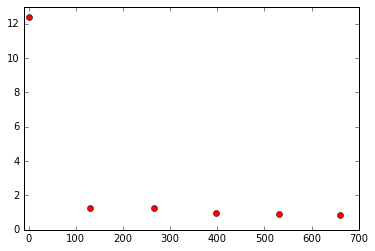

[12.406926399915173, 1.26836399680163, 1.2677172247710313, 0.98733406478543839, 0.91840037419500786, 0.88759155059118411]
[0.8196440499996243, 131.10201391699957, 264.76306144000046, 397.0705481449986, 529.9103020570001, 661.2492253749988]


In [45]:
import matplotlib.pyplot as plt
plt.plot(SGD_Time, SGD_Error,'ro')
plt.axis([-10, 700, 0, 13])
plt.show()
print(SGD_Error)
print(SGD_Time)

In [46]:
Y_star = (A*B)
for q in range (Nr):
    u = user[q]
    m = movie[q]
    r = rating[q]
    Y_star[u,m] = 0 ## movies that have already been watched

In [48]:


for t in range (20):
    
    userData = [(0,0)]
    for n in range (Nc):
        thisMovie = (Y_star[t,n],n)
        userData.append(thisMovie)
        
    userData = sorted(userData, key=lambda tup: tup[0], reverse=True)     
    
    print("Movies for user " , t+1 , " : ")
    for h in range(10):
        print (userData[h])
    

Movies for user  1  : 
(1.4877971659771978, 53)
(1.4849135560243847, 2503)
(1.4700184348832963, 1178)
(1.4688245405543574, 787)
(1.4602065942759861, 649)
(1.4584142100428334, 1247)
(1.4567454577833847, 950)
(1.4487421003070358, 557)
(1.4467686068732764, 750)
(1.4434139013462088, 3233)
Movies for user  2  : 
(4.9813436254497629, 53)
(4.971688914185882, 2503)
(4.9218180591774123, 1178)
(4.9178207415047339, 787)
(4.8889667063311713, 649)
(4.8829655645234382, 1247)
(4.8773783590762498, 950)
(4.8505820492978122, 557)
(4.8439745296970695, 750)
(4.8327425275299305, 3233)
Movies for user  3  : 
(5.0090193673333028, 53)
(4.9993110156629399, 2503)
(4.9491630842239909, 1178)
(4.9451435579384464, 787)
(4.9161292132400227, 649)
(4.9044764825312379, 950)
(4.8775312957010213, 557)
(4.8708870655216252, 750)
(4.8595926597107733, 3233)
(4.8526707895740895, 2905)
Movies for user  4  : 
(5.0398666188634698, 53)
(5.0300984798487267, 2503)
(4.9796417203256018, 1178)
(4.9755974404247745, 787)
(4.946404415485